In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ipl-data-set/Players.xlsx
/kaggle/input/ipl-data-set/teamwise_home_and_away.csv
/kaggle/input/ipl-data-set/matches.csv
/kaggle/input/ipl-data-set/teams.csv
/kaggle/input/ipl-data-set/deliveries.csv
/kaggle/input/ipl-data-set/most_runs_average_strikerate.csv


In [2]:
#important libraries

"""author s_agnik1511"""
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go

import gc
import sys

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder

# Models Libs
from xgboost import XGBRegressor

import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
teamwise_home_away=pd.read_csv('/kaggle/input/ipl-data-set/teamwise_home_and_away.csv')
teamwise_home_away

,team,home_wins,away_wins,home_matches,away_matches,home_win_percentage,away_win_percentage
0,Rising Pune Supergiant,5,5,8,8,62.500000,62.500000
1,Mumbai Indians,58,51,101,86,57.425743,59.302326
2,Chennai Super Kings,51,49,89,75,57.303371,65.333333
3,Delhi Capitals,3,7,6,10,50.000000,70.000000
4,Sunrisers Hyderabad,30,28,63,45,47.619048,62.222222
5,Rajasthan Royals,29,46,67,80,43.283582,57.500000
6,Deccan Chargers,18,11,43,32,41.860465,34.375000
7,Kings XI Punjab,38,44,91,85,41.758242,51.764706
8,Royal Challengers Bangalore,35,49,85,95,41.176471,51.578947
9,Kolkata Knight Riders,34,58,83,95,40.963855,61.052632


In [4]:
Players=pd.read_excel('/kaggle/input/ipl-data-set/Players.xlsx')
Players

,Player_Name,DOB,Batting_Hand,Bowling_Skill,Country
0,A Ashish Reddy,1991-02-24,Right_Hand,Right-arm medium,India
1,A Chandila,1983-12-05,Right_Hand,Right-arm offbreak,India
2,A Chopra,1977-09-19,Right_Hand,Right-arm offbreak,India
3,A Choudhary,NaT,Right_hand,Left-arm fast-medium,NaN
4,A Dananjaya,NaT,Right_Hand,Right-arm offbreak,NaN
...,...,...,...,...,...
561,Younis Khan,1977-11-29,Right_Hand,Right-arm medium,Pakistan
562,YS Chahal,1990-07-23,Right_Hand,Legbreak googly,India
563,Yuvraj Singh,1981-12-12,Left_Hand,Slow left-arm orthodox,India
564,YV Takawale,1984-11-05,Right_Hand,NaN,India


In [5]:
Matches=pd.read_csv('/kaggle/input/ipl-data-set/matches.csv')
Matches

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [6]:
SR=pd.read_csv('/kaggle/input/ipl-data-set/most_runs_average_strikerate.csv')
SR

,batsman,total_runs,out,numberofballs,average,strikerate
0,V Kohli,5426,152,4111,35.697368,131.987351
1,SK Raina,5386,160,3916,33.662500,137.538304
2,RG Sharma,4902,161,3742,30.447205,130.999466
3,DA Warner,4717,114,3292,41.377193,143.286756
4,S Dhawan,4601,137,3665,33.583942,125.538881
...,...,...,...,...,...,...
511,ND Doshi,0,1,13,0.000000,0.000000
512,J Denly,0,1,1,0.000000,0.000000
513,S Ladda,0,2,9,0.000000,0.000000
514,V Pratap Singh,0,1,1,0.000000,0.000000


In [7]:
Deliveries=pd.read_csv('/kaggle/input/ipl-data-set/deliveries.csv')
Deliveries

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [8]:
Teams=pd.read_csv('/kaggle/input/ipl-data-set/teams.csv')
Teams

,team1
0,Pune Warriors
1,Kolkata Knight Riders
2,Rajasthan Royals
3,Kochi Tuskers Kerala
4,Gujarat Lions
5,Chennai Super Kings
6,Rising Pune Supergiants
7,Delhi Daredevils
8,Deccan Chargers
9,Delhi Capitals


# Team Name Categorisation

In [9]:
teamwise_home_away['team'].replace('Pune Warriors',0,inplace=True)
teamwise_home_away['team'].replace('Kolkata Knight Riders',1,inplace=True)
teamwise_home_away['team'].replace('Rajasthan Royals',2,inplace=True)
teamwise_home_away['team'].replace('Kochi Tuskers Kerala',3,inplace=True)
teamwise_home_away['team'].replace('Gujarat Lions',4,inplace=True)
teamwise_home_away['team'].replace('Chennai Super Kings',5,inplace=True)
teamwise_home_away['team'].replace('Rising Pune Supergiants',6,inplace=True)
teamwise_home_away['team'].replace('Delhi Daredevils',7,inplace=True)
teamwise_home_away['team'].replace('Deccan Chargers',8,inplace=True)
teamwise_home_away['team'].replace('Delhi Capitals',9,inplace=True)
teamwise_home_away['team'].replace('Mumbai Indians',10,inplace=True)
teamwise_home_away['team'].replace('Sunrisers Hyderabad',11,inplace=True)
teamwise_home_away['team'].replace('Rising Pune Supergiant',12,inplace=True)
teamwise_home_away['team'].replace('Royal Challengers Bangalore',13,inplace=True)
teamwise_home_away['team'].replace('Kings XI Punjab',14,inplace=True)
teamwise_home_away

,team,home_wins,away_wins,home_matches,away_matches,home_win_percentage,away_win_percentage
0,12,5,5,8,8,62.500000,62.500000
1,10,58,51,101,86,57.425743,59.302326
2,5,51,49,89,75,57.303371,65.333333
3,9,3,7,6,10,50.000000,70.000000
4,11,30,28,63,45,47.619048,62.222222
5,2,29,46,67,80,43.283582,57.500000
6,8,18,11,43,32,41.860465,34.375000
7,14,38,44,91,85,41.758242,51.764706
8,13,35,49,85,95,41.176471,51.578947
9,1,34,58,83,95,40.963855,61.052632


In [10]:
Matches['team1'].replace('Pune Warriors',0,inplace=True)
Matches['team1'].replace('Kolkata Knight Riders',1,inplace=True)
Matches['team1'].replace('Rajasthan Royals',2,inplace=True)
Matches['team1'].replace('Kochi Tuskers Kerala',3,inplace=True)
Matches['team1'].replace('Gujarat Lions',4,inplace=True)
Matches['team1'].replace('Chennai Super Kings',5,inplace=True)
Matches['team1'].replace('Rising Pune Supergiants',6,inplace=True)
Matches['team1'].replace('Delhi Daredevils',7,inplace=True)
Matches['team1'].replace('Deccan Chargers',8,inplace=True)
Matches['team1'].replace('Delhi Capitals',9,inplace=True)
Matches['team1'].replace('Mumbai Indians',10,inplace=True)
Matches['team1'].replace('Sunrisers Hyderabad',11,inplace=True)
Matches['team1'].replace('Rising Pune Supergiant',12,inplace=True)
Matches['team1'].replace('Royal Challengers Bangalore',13,inplace=True)
Matches['team1'].replace('Kings XI Punjab',14,inplace=True)

Matches['team2'].replace('Pune Warriors',0,inplace=True)
Matches['team2'].replace('Kolkata Knight Riders',1,inplace=True)
Matches['team2'].replace('Rajasthan Royals',2,inplace=True)
Matches['team2'].replace('Kochi Tuskers Kerala',3,inplace=True)
Matches['team2'].replace('Gujarat Lions',4,inplace=True)
Matches['team2'].replace('Chennai Super Kings',5,inplace=True)
Matches['team2'].replace('Rising Pune Supergiants',6,inplace=True)
Matches['team2'].replace('Delhi Daredevils',7,inplace=True)
Matches['team2'].replace('Deccan Chargers',8,inplace=True)
Matches['team2'].replace('Delhi Capitals',9,inplace=True)
Matches['team2'].replace('Mumbai Indians',10,inplace=True)
Matches['team2'].replace('Sunrisers Hyderabad',11,inplace=True)
Matches['team2'].replace('Rising Pune Supergiant',12,inplace=True)
Matches['team2'].replace('Royal Challengers Bangalore',13,inplace=True)
Matches['team2'].replace('Kings XI Punjab',14,inplace=True)

Matches['toss_winner'].replace('Pune Warriors',0,inplace=True)
Matches['toss_winner'].replace('Kolkata Knight Riders',1,inplace=True)
Matches['toss_winner'].replace('Rajasthan Royals',2,inplace=True)
Matches['toss_winner'].replace('Kochi Tuskers Kerala',3,inplace=True)
Matches['toss_winner'].replace('Gujarat Lions',4,inplace=True)
Matches['toss_winner'].replace('Chennai Super Kings',5,inplace=True)
Matches['toss_winner'].replace('Rising Pune Supergiants',6,inplace=True)
Matches['toss_winner'].replace('Delhi Daredevils',7,inplace=True)
Matches['toss_winner'].replace('Deccan Chargers',8,inplace=True)
Matches['toss_winner'].replace('Delhi Capitals',9,inplace=True)
Matches['toss_winner'].replace('Mumbai Indians',10,inplace=True)
Matches['toss_winner'].replace('Sunrisers Hyderabad',11,inplace=True)
Matches['toss_winner'].replace('Rising Pune Supergiant',12,inplace=True)
Matches['toss_winner'].replace('Royal Challengers Bangalore',13,inplace=True)
Matches['toss_winner'].replace('Kings XI Punjab',14,inplace=True)

Matches['winner'].replace('Pune Warriors',0,inplace=True)
Matches['winner'].replace('Kolkata Knight Riders',1,inplace=True)
Matches['winner'].replace('Rajasthan Royals',2,inplace=True)
Matches['winner'].replace('Kochi Tuskers Kerala',3,inplace=True)
Matches['winner'].replace('Gujarat Lions',4,inplace=True)
Matches['winner'].replace('Chennai Super Kings',5,inplace=True)
Matches['winner'].replace('Rising Pune Supergiants',6,inplace=True)
Matches['winner'].replace('Delhi Daredevils',7,inplace=True)
Matches['winner'].replace('Deccan Chargers',8,inplace=True)
Matches['winner'].replace('Delhi Capitals',9,inplace=True)
Matches['winner'].replace('Mumbai Indians',10,inplace=True)
Matches['winner'].replace('Sunrisers Hyderabad',11,inplace=True)
Matches['winner'].replace('Rising Pune Supergiant',12,inplace=True)
Matches['winner'].replace('Royal Challengers Bangalore',13,inplace=True)
Matches['winner'].replace('Kings XI Punjab',14,inplace=True)

Matches

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,11,13,13,field,normal,0,11.0,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,10,12,12,field,normal,0,12.0,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,4,1,1,field,normal,0,1.0,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,12,14,14,field,normal,0,14.0,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,13,7,13,bat,normal,0,13.0,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,1,10,10,field,normal,0,10.0,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,IPL-2019,Chennai,07-05-2019,5,10,5,bat,normal,0,10.0,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,IPL-2019,Visakhapatnam,08-05-2019,11,9,9,field,normal,0,9.0,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,IPL-2019,Visakhapatnam,10-05-2019,9,5,5,field,normal,0,5.0,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [11]:
Deliveries['batting_team'].replace('Pune Warriors',0,inplace=True)
Deliveries['batting_team'].replace('Kolkata Knight Riders',1,inplace=True)
Deliveries['batting_team'].replace('Rajasthan Royals',2,inplace=True)
Deliveries['batting_team'].replace('Kochi Tuskers Kerala',3,inplace=True)
Deliveries['batting_team'].replace('Gujarat Lions',4,inplace=True)
Deliveries['batting_team'].replace('Chennai Super Kings',5,inplace=True)
Deliveries['batting_team'].replace('Rising Pune Supergiants',6,inplace=True)
Deliveries['batting_team'].replace('Delhi Daredevils',7,inplace=True)
Deliveries['batting_team'].replace('Deccan Chargers',8,inplace=True)
Deliveries['batting_team'].replace('Delhi Capitals',9,inplace=True)
Deliveries['batting_team'].replace('Mumbai Indians',10,inplace=True)
Deliveries['batting_team'].replace('Sunrisers Hyderabad',11,inplace=True)
Deliveries['batting_team'].replace('Rising Pune Supergiant',12,inplace=True)
Deliveries['batting_team'].replace('Royal Challengers Bangalore',13,inplace=True)
Deliveries['batting_team'].replace('Kings XI Punjab',14,inplace=True)

Deliveries['bowling_team'].replace('Pune Warriors',0,inplace=True)
Deliveries['bowling_team'].replace('Kolkata Knight Riders',1,inplace=True)
Deliveries['bowling_team'].replace('Rajasthan Royals',2,inplace=True)
Deliveries['bowling_team'].replace('Kochi Tuskers Kerala',3,inplace=True)
Deliveries['bowling_team'].replace('Gujarat Lions',4,inplace=True)
Deliveries['bowling_team'].replace('Chennai Super Kings',5,inplace=True)
Deliveries['bowling_team'].replace('Rising Pune Supergiants',6,inplace=True)
Deliveries['bowling_team'].replace('Delhi Daredevils',7,inplace=True)
Deliveries['bowling_team'].replace('Deccan Chargers',8,inplace=True)
Deliveries['bowling_team'].replace('Delhi Capitals',9,inplace=True)
Deliveries['bowling_team'].replace('Mumbai Indians',10,inplace=True)
Deliveries['bowling_team'].replace('Sunrisers Hyderabad',11,inplace=True)
Deliveries['bowling_team'].replace('Rising Pune Supergiant',12,inplace=True)
Deliveries['bowling_team'].replace('Royal Challengers Bangalore',13,inplace=True)
Deliveries['bowling_team'].replace('Kings XI Punjab',14,inplace=True)

Deliveries

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,11,13,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,11,13,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,11,13,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,11,13,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,11,13,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,5,10,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,5,10,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,5,10,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,5,10,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [12]:
# checking if there's any data leakages


#Matches
mm=len(Matches==np.NaN)
#team_home_away_performance
ha=len(teamwise_home_away==np.NaN)
#Deliveries
d=len(Deliveries==np.NaN)

print(mm,ha,d)

756 14 179078


found out huge leakages in data :(

Let's replace those zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz

some pre-processing before replacing data leakages

In [13]:
def non_num_data(df):
    columns=df.columns.values
    
    for column in columns:
        text_digit_vals={}
        def con_to_int(val):
            return text_digit_vals[val]
        
        if df[column].dtype!=np.int64 and df[column].dtype!=np.float64:
            column_contents=df[column].values.tolist()
            unique_elements=set(column_contents)
            x=0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique]=x
                    x+=1
            df[column]=list(map(con_to_int,df[column]))
    return df

In [14]:
print(non_num_data(teamwise_home_away))
print(non_num_data(Matches))
print(non_num_data(Deliveries))

    team  home_wins  away_wins  home_matches  away_matches  \
0     12          5          5             8             8   
1     10         58         51           101            86   
2      5         51         49            89            75   
3      9          3          7             6            10   
4     11         30         28            63            45   
5      2         29         46            67            80   
6      8         18         11            43            32   
7     14         38         44            91            85   
8     13         35         49            85            95   
9      1         34         58            83            95   
10     7         25         42            72            89   
11     0          6          6            20            26   
12     3          2          4             7             7   
13     4          1         12            14            16   

    home_win_percentage  away_win_percentage  
0             62.50000

In [15]:
len(Deliveries==np.NaN)

179078

In [16]:
teamwise_home_away.replace(np.NaN,-99999,inplace=True)
Matches.replace(np.NaN,-99999,inplace=True)
Deliveries.replace(np.NaN,-99999,inplace=True)

In [17]:
print(teamwise_home_away)
print(Matches)
print(Deliveries)

    team  home_wins  away_wins  home_matches  away_matches  \
0     12          5          5             8             8   
1     10         58         51           101            86   
2      5         51         49            89            75   
3      9          3          7             6            10   
4     11         30         28            63            45   
5      2         29         46            67            80   
6      8         18         11            43            32   
7     14         38         44            91            85   
8     13         35         49            85            95   
9      1         34         58            83            95   
10     7         25         42            72            89   
11     0          6          6            20            26   
12     3          2          4             7             7   
13     4          1         12            14            16   

    home_win_percentage  away_win_percentage  
0             62.50000

<BarContainer object of 14 artists>

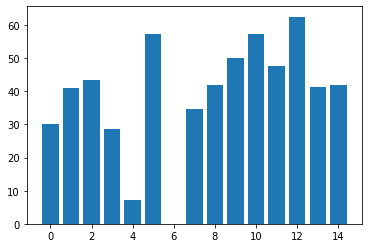

In [18]:
y1=teamwise_home_away['home_win_percentage']
x1=teamwise_home_away['team']
plt.bar(x1,y1)

<BarContainer object of 14 artists>

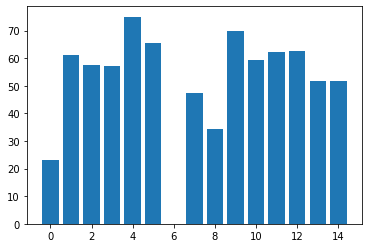

In [19]:
y2=teamwise_home_away['away_win_percentage']
x2=teamwise_home_away['team']
plt.bar(x2,y2)

<BarContainer object of 14 artists>

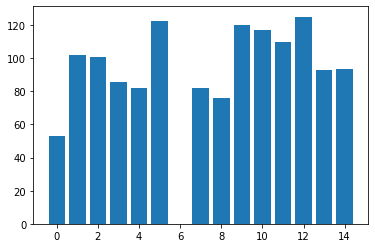

In [20]:
y_tot=y1+y2
x_tot=x2
plt.bar(x_tot,y_tot)

Looks like RPS was a failure :\

toss won at home ground


In [21]:
hmtswn=len(Matches[Matches['team1']==Matches['toss_winner']])
print('won toss at home ground',hmtswn/len(Matches))

won toss at home ground 0.38756613756613756


toss won at away ground

In [22]:
awtswn=len(Matches[Matches['team2']==Matches['toss_winner']])
print('won toss at away ground', awtswn/len(Matches))

won toss at away ground 0.6124338624338624


toss decision at home

In [23]:
home_matches=Matches[Matches['team1']==Matches['toss_winner']]
hm_bat=len(home_matches[home_matches['toss_decision']==1])
print('percentage of choosing bat after winning the toss at home ground: ',hm_bat/len(home_matches))
print('percentage of choosing field after winning the toss at home ground: ',1-(hm_bat/len(home_matches)))

percentage of choosing bat after winning the toss at home ground:  1.0
percentage of choosing field after winning the toss at home ground:  0.0


toss decision at away

In [24]:
home_matches=Matches[Matches['team2']==Matches['toss_winner']]
hm_bat=len(home_matches[home_matches['toss_decision']==1])
print('percentage of choosing bat after winning the toss at home ground: ',hm_bat/len(home_matches))
print('percentage of choosing field after winning the toss at home ground: ',1-(hm_bat/len(home_matches)))

percentage of choosing bat after winning the toss at home ground:  0.0
percentage of choosing field after winning the toss at home ground:  1.0


Conclusion : 
Data isn't well manufactured.
It's giving huge differences over EDA

team won by runs

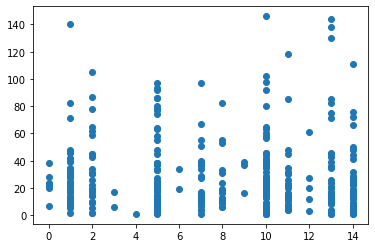

In [25]:
win_df=Matches[Matches['win_by_runs']!=0]
team_won1=win_df['winner']
by_runs=win_df['win_by_runs']
plt.scatter(team_won1,by_runs)

In [26]:
team=Teams['team1']
print('Average win run trail')
for i in range(15):
    val=win_df[win_df['winner']==i]
    tot_run=sum(val['win_by_runs'])
    print(team[i],'---',tot_run/len(val))
    

Average win run trail
Pune Warriors --- 23.166666666666668
Kolkata Knight Riders --- 30.166666666666668
Rajasthan Royals --- 33.148148148148145
Kochi Tuskers Kerala --- 11.5
Gujarat Lions --- 1.0
Chennai Super Kings --- 34.19230769230769
Rising Pune Supergiants --- 26.5
Delhi Daredevils --- 27.0
Deccan Chargers --- 23.38888888888889
Delhi Capitals --- 30.666666666666668
Mumbai Indians --- 32.73684210526316
Sunrisers Hyderabad --- 23.766666666666666
Rising Pune Supergiant --- 24.6
Royal Challengers Bangalore --- 35.77142857142857
Kings XI Punjab --- 24.342105263157894


team won by wickets


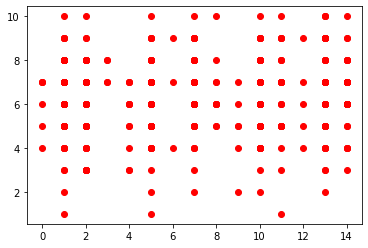

In [27]:
wick_df=Matches[Matches['win_by_wickets']!=0]
team_won2=wick_df['winner']
wick=wick_df['win_by_wickets']
plt.scatter(team_won2,wick,color='r')


In [28]:
print('Average win wicket trail')
for i in range(15):
    val1=wick_df[wick_df['winner']==i]
    tot_run1=sum(val1['win_by_wickets'])
    print(team[i],'---',tot_run1//len(val1))

Average win wicket trail
Pune Warriors --- 6
Kolkata Knight Riders --- 6
Rajasthan Royals --- 5
Kochi Tuskers Kerala --- 7
Gujarat Lions --- 5
Chennai Super Kings --- 6
Rising Pune Supergiants --- 6
Delhi Daredevils --- 6
Deccan Chargers --- 6
Delhi Capitals --- 4
Mumbai Indians --- 6
Sunrisers Hyderabad --- 6
Rising Pune Supergiant --- 6
Royal Challengers Bangalore --- 6
Kings XI Punjab --- 6


([<matplotlib.patches.Wedge at 0x7f946a30ba10>,
 [Text(-0.25208530194380285, 1.0707254552610121, 'Pune Warriors'),
  Text(-0.7274214013942623, 0.8251412635383155, 'Kolkata Knight Riders'),
  Text(-1.0980655239102493, 0.06520816819777885, 'Rajasthan Royals'),
  Text(-1.0429955904726222, -0.34951423183422176, 'Kochi Tuskers Kerala'),
  Text(-1.0074665824460889, -0.4416005947169885, 'Gujarat Lions'),
  Text(-0.6425867611910884, -0.8927946316717789, 'Chennai Super Kings'),
  Text(0.18076925003876448, -1.08504491991826, 'Delhi Daredevils'),
  Text(0.6378915260411488, -0.8961553442372001, 'Deccan Chargers'),
  Text(0.7912737562269319, -0.764124232508381, 'Delhi Capitals'),
  Text(1.0767954319083635, -0.22474785387469473, 'Mumbai Indians'),
  Text(0.918189594840797, 0.6057457122638948, 'Sunrisers Hyderabad'),
  Text(0.6799542543197061, 0.8646746278413241, 'Rising Pune Supergiant'),
  Text(0.24252079322485975, 1.072932274122456, 'Royal Challengers Bangalore')])

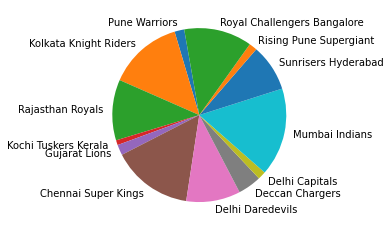

In [29]:
wins=[]
team_1=[]
tot_wins=sum(teamwise_home_away['home_wins']+teamwise_home_away['away_wins'])
for i in range(14):
    val2=teamwise_home_away[teamwise_home_away['team']==i]
    if i!=6:
        wins.append(int(val2['home_wins']+val2['away_wins']))
        team_1.append(team[i])
plt.pie(wins,labels=team_1,startangle=100)

Batsman and Runs

<BarContainer object of 50 artists>

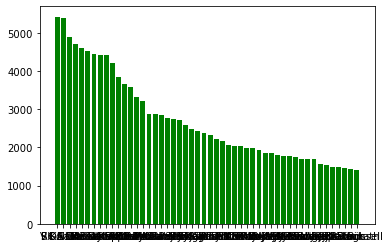

In [30]:
btmn=SR['batsman'].head(50)
tot_runs1=SR['total_runs'].head(50)
plt.bar(btmn,tot_runs1,label=np.array(50),color='g')

strike rate over runs

(50,) (50,)


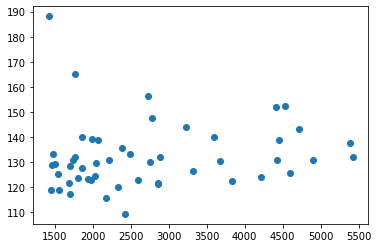

In [31]:
strike_rate=SR['strikerate'].head(50)
# plt.bar(strike_rate,tot_runs1)
print(strike_rate.shape,tot_runs1.shape)
plt.scatter(tot_runs1,strike_rate)

4 runs

([<matplotlib.patches.Wedge at 0x7f9469fc4c90>,
 [Text(-0.701667334605075, 0.8471498991018117, 'Pune Warriors'),
  Text(-1.0033448975266277, 0.45088692219588844, 'Kolkata Knight Riders'),
  Text(-1.0611494661172456, -0.28976164438911695, 'Rajasthan Royals'),
  Text(-0.9042989965010921, -0.6262933217966786, 'Kochi Tuskers Kerala'),
  Text(-0.8395088802024533, -0.7107916994881294, 'Gujarat Lions'),
  Text(-0.4882085251369104, -0.9857243204789273, 'Chennai Super Kings'),
  Text(-0.10543448476649087, -1.0949354179229132, 'Rising Pune Supergiants'),
  Text(0.2852807058518915, -1.062362894150886, 'Delhi Daredevils'),
  Text(0.7434033149754863, -0.8107721697761081, 'Deccan Chargers'),
  Text(0.8798079096493581, -0.6602560428488535, 'Delhi Capitals'),
  Text(1.0765104694257543, -0.22610884373845816, 'Mumbai Indians'),
  Text(1.00657474778962, 0.4436296621195014, 'Sunrisers Hyderabad'),
  Text(0.8635470757537171, 0.6813856822367227, 'Rising Pune Supergiant'),
  Text(0.5364506305052875, 0.960323

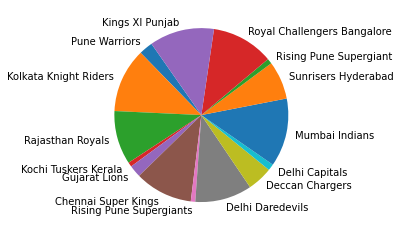

In [32]:
arr1=[]
team_temp=[]
delv_temp=Deliveries[Deliveries['batsman_runs']>=4]
delv=delv_temp[delv_temp['batsman_runs']<=5]
for i in range(15):
    d=delv[delv['batting_team']==i]
    if len(d)!=0:
        team_temp.append(team[i])
        arr1.append(len(d))
plt.pie(arr1,labels=team_temp,startangle=125)
    


6 runs

([<matplotlib.patches.Wedge at 0x7f9469f4a8d0>,
 [Text(-0.6969036293582092, 0.8510730470337762, 'Pune Warriors'),
  Text(-0.9897726535262985, 0.4799480121133019, 'Kolkata Knight Riders'),
  Text(-1.084530054990446, -0.18383296718059153, 'Rajasthan Royals'),
  Text(-0.9906005398466936, -0.4782369396600804, 'Kochi Tuskers Kerala'),
  Text(-0.9492840419242845, -0.5557515701713253, 'Gujarat Lions'),
  Text(-0.6272957463199607, -0.9036039213332818, 'Chennai Super Kings'),
  Text(-0.22492083415996147, -1.076759313106131, 'Rising Pune Supergiants'),
  Text(0.14017540469950904, -1.0910320141578473, 'Delhi Daredevils'),
  Text(0.6110614285554433, -0.9146605548135227, 'Deccan Chargers'),
  Text(0.7704652580395598, -0.7851008127330111, 'Delhi Capitals'),
  Text(1.0372611969917405, -0.3661819345834277, 'Mumbai Indians'),
  Text(1.0547826480572586, 0.3121435012255057, 'Sunrisers Hyderabad'),
  Text(0.9507745053224482, 0.5531978308244293, 'Rising Pune Supergiant'),
  Text(0.5974723577066519, 0.92359

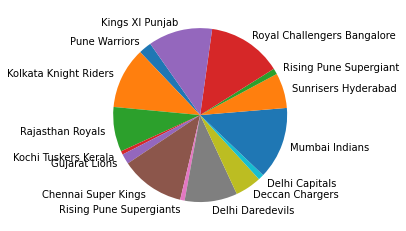

In [33]:
arr1=[]
team_temp=[]
delv_temp=Deliveries[Deliveries['batsman_runs']>=6]
delv=delv_temp[delv_temp['batsman_runs']<=7]
for i in range(15):
    d=delv[delv['batting_team']==i]
    if len(d)!=0:
        team_temp.append(team[i])
        arr1.append(len(d))
plt.pie(arr1,labels=team_temp,startangle=125)

Only boundaries

([<matplotlib.patches.Wedge at 0x7f9469ed1410>,
 [Text(-0.7003093994109841, 0.8482728011062401, 'Pune Warriors'),
  Text(-0.9995561362682092, 0.459224923592535, 'Kolkata Knight Riders'),
  Text(-1.0688898102692936, -0.259758683209, 'Rajasthan Royals'),
  Text(-0.9312814915690342, -0.5854184686708775, 'Kochi Tuskers Kerala'),
  Text(-0.8735649150527435, -0.6684940831367869, 'Gujarat Lions'),
  Text(-0.5291316784344917, -0.9643752728461561, 'Chennai Super Kings'),
  Text(-0.13974470828659522, -1.091087263469744, 'Rising Pune Supergiants'),
  Text(0.2442616311813026, -1.0725372979680705, 'Delhi Daredevils'),
  Text(0.7072614385840861, -0.8424851675204551, 'Deccan Chargers'),
  Text(0.8505293408133111, -0.6975670866774568, 'Delhi Capitals'),
  Text(1.0672000522211984, -0.26661591951545444, 'Mumbai Indians'),
  Text(1.0220429246693608, 0.40672873040061924, 'Sunrisers Hyderabad'),
  Text(0.8902855693968312, 0.6460585150926812, 'Rising Pune Supergiant'),
  Text(0.5541148226883, 0.950240371315

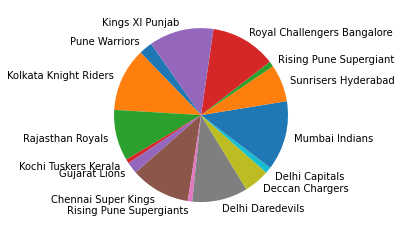

In [34]:
arr1=[]
team_temp=[]
delv_temp=Deliveries[Deliveries['batsman_runs']>=4]
delv=delv_temp[delv_temp['batsman_runs']<=7]
for i in range(15):
    d=delv[delv['batting_team']==i]
    if len(d)!=0:
        team_temp.append(team[i])
        arr1.append(len(d))
plt.pie(arr1,labels=team_temp,startangle=125)

effective boundaries

[0.13283115928715783,
 0.16209607824335986,
 0.1573560027758501,
 0.14096080910240202,
 0.17274256870443072,
 0.16071247849407955,
 0.15126582278481013,
 0.15783029915894814,
 0.15076378127075493,
 0.17286537454164483,
 0.1636677129846589,
 0.1537806011775643,
 0.15052631578947367,
 0.1674000382628659,
 0.16449285748411446]

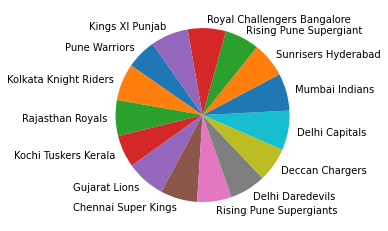

In [35]:
arr1=[]
team_temp=[]
delv_temp=Deliveries[Deliveries['batsman_runs']>=4]
delv=delv_temp[delv_temp['batsman_runs']<=7]
for i in range(15):
    d=delv[delv['batting_team']==i]
    d1=len(Deliveries[Deliveries['batting_team']==i])
    if len(d)!=0:
        team_temp.append(team[i])
        arr1.append(len(d)/d1)
plt.pie(arr1,labels=team_temp,startangle=125)
arr1

Looking after the effective boundary chart we can say each team was built balanced .
No team played far better than any other. ;)

dot balls per team

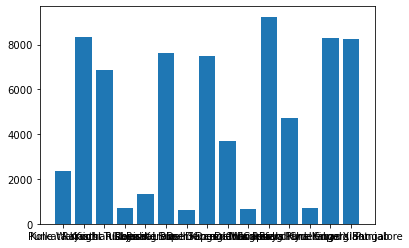

([<matplotlib.patches.Wedge at 0x7f9469cfa8d0>,
 [Text(-0.3027556206970098, 1.0575155006600936, 'Pune Warriors'),
  Text(-0.7517931714285823, 0.8029987717259314, 'Kolkata Knight Riders'),
  Text(-1.0885140774030726, 0.15854684889753565, 'Rajasthan Royals'),
  Text(-1.0800874236445566, -0.20835344317976684, 'Kochi Tuskers Kerala'),
  Text(-1.0568348604374658, -0.30512305347862867, 'Gujarat Lions'),
  Text(-0.8566509517984298, -0.6900356126917251, 'Chennai Super Kings'),
  Text(-0.5547526169480959, -0.949868166636423, 'Rising Pune Supergiants'),
  Text(-0.18665603834879183, -1.0840477495700707, 'Delhi Daredevils'),
  Text(0.34989269079835056, -1.0428686901647255, 'Deccan Chargers'),
  Text(0.5426049521795507, -0.9568593762252778, 'Delhi Capitals'),
  Text(0.8979155007145929, -0.6354114836674437, 'Mumbai Indians'),
  Text(1.099989753754812, 0.00474780311599003, 'Sunrisers Hyderabad'),
  Text(1.0669564936803317, 0.26758893959461916, 'Rising Pune Supergiant'),
  Text(0.879122496998339, 0.66

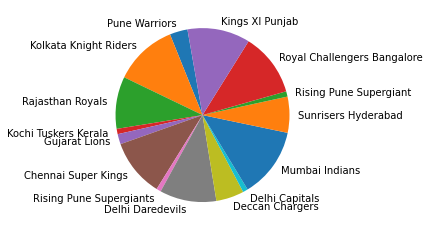

In [36]:
arr1=[]
team_temp=[]
delv=Deliveries[Deliveries['batsman_runs']==0]
# delv=delv_temp[delv_temp['batsman_runs']<=7]
for i in range(15):
    d=delv[delv['batting_team']==i]
    if len(d)!=0:
        team_temp.append(team[i])
        arr1.append(len(d))
plt.bar(team_temp,arr1)
plt.show()
plt.pie(arr1,labels=team_temp,startangle=100)

Still showing same results .The team who played multiple IPLs have huge runs in the other hand the opposites have less compared to them

Fielding Analysis

4 runs

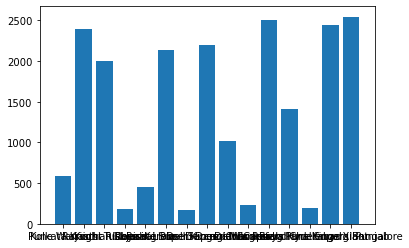

([<matplotlib.patches.Wedge at 0x7f9469c24b50>,
 [Text(-0.28704197624394223, 1.061888366954819, 'Pune Warriors'),
  Text(-0.7265496140892913, 0.8259089890942598, 'Kolkata Knight Riders'),
  Text(-1.083465571406305, 0.19000619878627317, 'Rajasthan Royals'),
  Text(-1.085647232319563, -0.17711602682104519, 'Kochi Tuskers Kerala'),
  Text(-1.0633068127563239, -0.2817421195809891, 'Gujarat Lions'),
  Text(-0.8713524104731819, -0.6713754365201157, 'Chennai Super Kings'),
  Text(-0.5844040906000909, -0.9319183756584484, 'Rising Pune Supergiants'),
  Text(-0.2153087249941985, -1.0787224633525405, 'Delhi Daredevils'),
  Text(0.32014039347958195, -1.0523830711593278, 'Deccan Chargers'),
  Text(0.5147634914240509, -0.9721206447231338, 'Delhi Capitals'),
  Text(0.8668568637204057, -0.6771699770521595, 'Mumbai Indians'),
  Text(1.0978736696220566, -0.06836231089276658, 'Sunrisers Hyderabad'),
  Text(1.0813137675498798, 0.20189238744213409, 'Rising Pune Supergiant'),
  Text(0.9143852914867789, 0.61

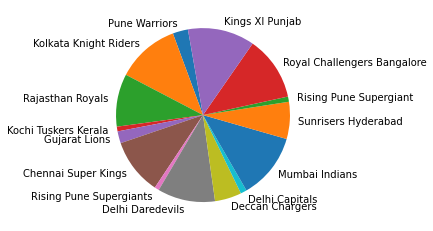

In [37]:
arr1=[]
team_temp=[]
delv_temp=Deliveries[Deliveries['batsman_runs']>=4]
delv=delv_temp[delv_temp['batsman_runs']<=5]
for i in range(15):
    d=delv[delv['bowling_team']==i]
    if len(d)!=0:
        team_temp.append(team[i])
        arr1.append(len(d))
plt.bar(team_temp,arr1)
plt.show()
plt.pie(arr1,labels=team_temp,startangle=100)

6 runs

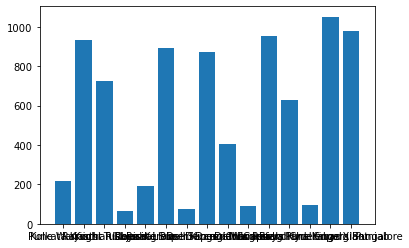

([<matplotlib.patches.Wedge at 0x7f9469ad3290>,
 [Text(-0.28092499084269956, 1.0635229896527998, 'Pune Warriors'),
  Text(-0.7088445268886716, 0.8411536344211892, 'Kolkata Knight Riders'),
  Text(-1.0700564054909805, 0.2549103549637056, 'Rajasthan Royals'),
  Text(-1.097314558747066, -0.07681639904169006, 'Kochi Tuskers Kerala'),
  Text(-1.084477067352034, -0.18414529694654677, 'Gujarat Lions'),
  Text(-0.9174084483529352, -0.6069281167409035, 'Chennai Super Kings'),
  Text(-0.633958204844545, -0.8989421530389383, 'Rising Pune Supergiants'),
  Text(-0.27356707602602554, -1.065439371768554, 'Delhi Daredevils'),
  Text(0.26045423340469437, -1.0687205398520105, 'Deccan Chargers'),
  Text(0.45922583019896585, -0.9995557197465635, 'Delhi Capitals'),
  Text(0.8137462695061735, -0.740146613087425, 'Mumbai Indians'),
  Text(1.0907471964515996, -0.14237469379414205, 'Sunrisers Hyderabad'),
  Text(1.0878126441911735, 0.16329008279074272, 'Rising Pune Supergiant'),
  Text(0.9141322494064517, 0.61

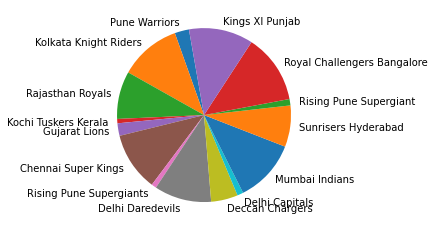

In [38]:
arr1=[]
team_temp=[]
delv_temp=Deliveries[Deliveries['batsman_runs']>=6]
delv=delv_temp[delv_temp['batsman_runs']<=7]
for i in range(15):
    d=delv[delv['bowling_team']==i]
    if len(d)!=0:
        team_temp.append(team[i])
        arr1.append(len(d))
plt.bar(team_temp,arr1)
plt.show()
plt.pie(arr1,labels=team_temp,startangle=100)

effective boundaries

[0.14716149182436156,
 0.15969891648288426,
 0.1578764746703678,
 0.1554993678887484,
 0.18059450364554122,
 0.15332456229126606,
 0.15632911392405063,
 0.16310018098584053,
 0.15729466460039848,
 0.1712938711367208,
 0.1530129537114815,
 0.1579640533002789,
 0.15526315789473685,
 0.16696958102161852,
 0.16841049161530744]

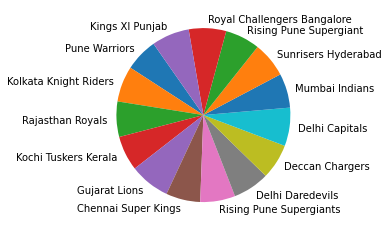

In [39]:
arr1=[]
team_temp=[]
delv_temp=Deliveries[Deliveries['batsman_runs']>=4]
delv=delv_temp[delv_temp['batsman_runs']<=7]
for i in range(15):
    d=delv[delv['bowling_team']==i]
    d1=len(Deliveries[Deliveries['batting_team']==i])
    if len(d)!=0:
        team_temp.append(team[i])
        arr1.append(len(d)/d1)
plt.pie(arr1,labels=team_temp,startangle=125)
arr1

In [40]:
for col in Deliveries.columns: 
    print(col) 

match_id
inning
batting_team
bowling_team
over
ball
batsman
non_striker
bowler
is_super_over
wide_runs
bye_runs
legbye_runs
noball_runs
penalty_runs
batsman_runs
extra_runs
total_runs
player_dismissed
dismissal_kind
fielder


(179078,)

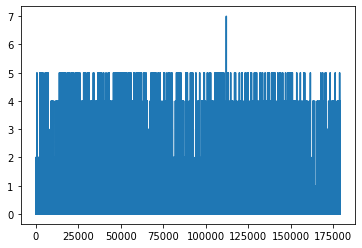

In [41]:
extras=Deliveries['wide_runs']+Deliveries['bye_runs']+Deliveries['legbye_runs']+Deliveries['noball_runs']+Deliveries['penalty_runs']
plt.plot(extras)
extras.shape

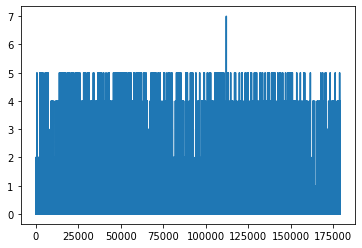

In [42]:
delv1=Deliveries['extra_runs']
plt.plot(delv1)

match win per season

In [43]:
max(Matches['Season'])

11

In [44]:
ses=max(Matches['Season'])
for i in range(int(ses)):
    sess=Matches[Matches['Season']==i]
    for j in range(15):
        prt_tm=len(sess[sess['winner']==j])
        tot_mt=len(sess[sess['team1']==j])
        tot_mt+=len(sess[sess['team2']==j])
        if tot_mt !=0:
            print(team[j],'won :',prt_tm)
            print('effective win: ',prt_tm/tot_mt)
    print('\n')


Kolkata Knight Riders won : 3
effective win:  0.23076923076923078
Rajasthan Royals won : 6
effective win:  0.46153846153846156
Chennai Super Kings won : 8
effective win:  0.5714285714285714
Delhi Daredevils won : 10
effective win:  0.6666666666666666
Deccan Chargers won : 9
effective win:  0.5625
Mumbai Indians won : 5
effective win:  0.38461538461538464
Royal Challengers Bangalore won : 9
effective win:  0.5625
Kings XI Punjab won : 7
effective win:  0.5


Pune Warriors won : 4
effective win:  0.25
Kolkata Knight Riders won : 12
effective win:  0.7058823529411765
Rajasthan Royals won : 7
effective win:  0.4375
Chennai Super Kings won : 10
effective win:  0.5555555555555556
Delhi Daredevils won : 11
effective win:  0.6111111111111112
Deccan Chargers won : 4
effective win:  0.26666666666666666
Mumbai Indians won : 10
effective win:  0.5882352941176471
Royal Challengers Bangalore won : 8
effective win:  0.5333333333333333
Kings XI Punjab won : 8
effective win:  0.5


Kolkata Knight Rider

team performance by season

only checking top 3 team 
1. MI
2. CSK
3. KKR

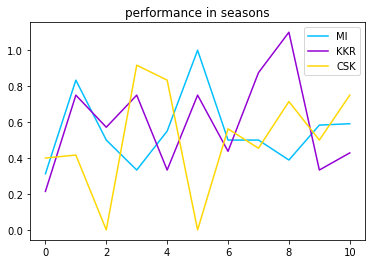

In [45]:
mi=[]
kkr=[]
csk=[]
for i in range(int(ses)):
    xx=Matches[Matches['Season']==i]
    mi.append(len(xx[xx['winner']==10])/(len(xx[xx['team1']==10])+len(xx[xx['team1']==10])))
    kkr.append(len(xx[xx['winner']==1])/(len(xx[xx['team1']==1])+len(xx[xx['team1']==1])))
#     csk.append(len(xx[xx['winner']==5])/(len(xx[xx['team1']==5])+len(xx[xx['team1']==5])))
    csk1=(len(xx[xx['team1']==5])+len(xx[xx['team1']==5]))
    if csk1!=0:
        csk.append(len(xx[xx['winner']==5])/(len(xx[xx['team1']==5])+len(xx[xx['team1']==5])))
    else:
        csk.append(int(0))
plt.title('performance in seasons')
plt.plot(mi,color='deepskyblue',label='MI')
plt.legend()
plt.plot(kkr,color='darkviolet',label='KKR')
plt.legend()
plt.plot(csk,color='gold',label='CSK')
plt.legend()
plt.show()

In [46]:
#players who bat with left arm
print(' left arm batsman : ',len(Players[Players['Batting_Hand']=='Left_Hand']))

#players who bat with right arm
print(' right arm batsman : ',len(Players[Players['Batting_Hand']=='Right_Hand']))

#data_leakage

# print(len(Players[Players['Batting_Hand']=='NaN']))
# print(142+373)
# len(Players)
xx=Players[Players['Batting_Hand']!='Right_Hand']
x=xx[xx['Batting_Hand']!='Left_Hand']
y=x[x['Batting_Hand']!='Right_hand']
y

 left arm batsman :  142
 right arm batsman :  373


,Player_Name,DOB,Batting_Hand,Bowling_Skill,Country
197,J Dala,NaT,NaN,Right-arm Medium,NaN
440,S Midhun,NaT,NaN,Legbreak,NaN
520,Tejas Baroka,NaT,NaN,Legbreak googly,NaN


Some data leakages are present in the data .But in this case we can simply overlook them . Data showing that overall the teams are balanced well and claim to capture the cup approximately equally.

Teams have much variance in their performace in every year except 3 teams MI,RCB,CSK. In this data MI,CSK are consistent in the top ranking whereas RCB is consistent down the leaderboard.


Overall bowlers are heavily dominated in this league. Extras are quite often seen in any match.

As per the hope and goal of IPL it is surely creating a way to the rising players to reach up international skill over cricket.

A great percentage is making their way to the National Cricket Team.
EDA over teams and other facts ends here.


# UPVOTE  Please if you liked this EDA :)

** Thank from s_agnik1511**


You can join my discord server for a huge data-science community
Link of the server - https://discord.gg//j9Dh8A